In [20]:
import seaborn as sns; sns.set()

In [30]:
import h5py
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
def load_dict_from_hdf5(filename):
    """
    ....
    """
    with h5py.File(filename, 'r') as h5file:
        return recursively_load_dict_contents_from_group(h5file, '/')

def recursively_load_dict_contents_from_group(h5file, path):
    """
    ....
    """
    ans = {}
    for key, item in h5file[path].items():
        if isinstance(item, h5py._hl.dataset.Dataset):
            try:
                ans[key] = item.value
            except:
                ans[key] = None
        elif isinstance(item, h5py._hl.group.Group):
            ans[key] = recursively_load_dict_contents_from_group(h5file, path + key + '/')
    return ans


In [3]:
dd = load_dict_from_hdf5('./cnv_data.h5')

In [32]:
norm_counts = dd['normalized_counts']['mg1655_chr1']

In [33]:
norm_counts.shape

(19, 51)

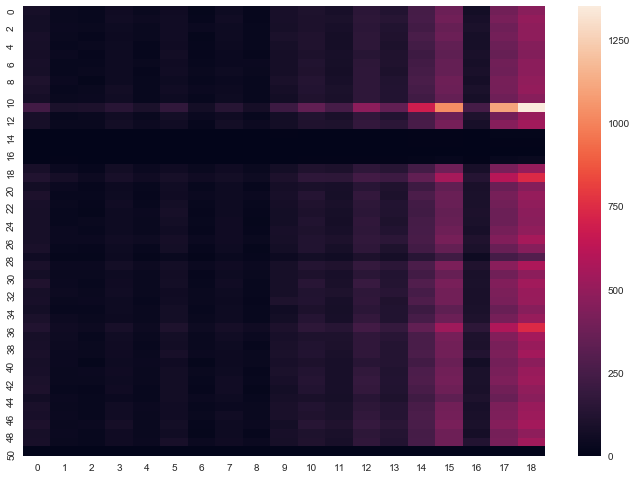

In [36]:
ax = sns.heatmap(norm_counts.T)

In [5]:
dd['constants']

{'bin_size': 20000,
 'chroms': array([b'mg1655_chr1'], dtype='|S11'),
 'num_bins_per_chrom': array([51]),
 'num_cells': 10,
 'num_chroms': 1,
 'num_nodes': 19}

In [45]:
dd['cnvs']

{'mg1655_chr1': array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            2,    2,    1,    0,    0,    0,    0,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1, -128],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            2,    2,    1,    0,    0,    0,    0,    2,    2,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1, -128],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    2,
            2,    1,    1,    0,    0,    0,    0,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,

In [21]:
cnv_profile = dd['cnvs']['mg1655_chr1']

In [27]:
cnv_profile = cnv_profile[0:19, 0:50]

In [40]:
cnv_profile.shape

(19, 50)

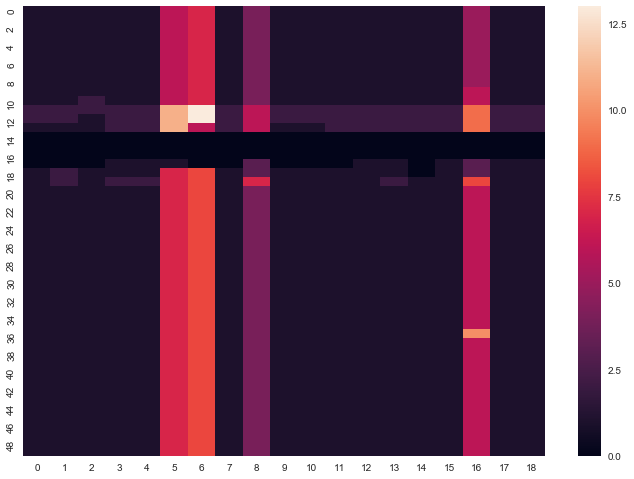

In [31]:
ax = sns.heatmap(cnv_profile.T)

In [44]:
dd['tree']['is_cell_in_group']

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)

In [43]:
dd['tree']['is_cell_in_group'].shape

(9, 10)

In [13]:
dd['genome_tracks']

{'gc_fraction': {'mg1655_chr1': array([0.51005, 0.52925, 0.52165, 0.5459 , 0.5224 , 0.5224 , 0.525  ,
         0.47755, 0.5397 , 0.5097 , 0.52965, 0.48765, 0.50945, 0.53125,
         0.5469 , 0.4802 , 0.5109 , 0.5304 , 0.53915, 0.4965 , 0.512  ,
         0.5242 , 0.51335, 0.51315, 0.5244 , 0.52945, 0.51185, 0.51835,
         0.4463 , 0.4944 , 0.52165, 0.53   , 0.5024 , 0.49905, 0.5167 ,
         0.49975, 0.51945, 0.51495, 0.51285, 0.51155, 0.52145, 0.5326 ,
         0.50655, 0.5089 , 0.5087 , 0.52675, 0.51895, 0.4903 , 0.52195,
         0.50155, 0.5    ])},
 'is_mappable': {'mg1655_chr1': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True, Fa

In [7]:
tree = dd['tree']

In [8]:
tree

{'Z': array([[ 0.,  2.,  0.,  2.],
        [ 1.,  3.,  0.,  2.],
        [ 7., 10.,  0.,  3.],
        [ 4., 11.,  0.,  3.],
        [ 9., 12.,  0.,  4.],
        [13., 14.,  1.,  7.],
        [ 5.,  6.,  8.,  2.],
        [ 8., 15., 30.,  8.],
        [16., 17., 64., 10.]], dtype=float32),
 'heterogeneity': {'mg1655_chr1': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        , -0.        , -0.        , -0.        ,
          -0.5       , -0.        , -0.5       , -0.        , -0.        ,
          -0.        , -0.        , -0.        , -0.        , -0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
 

In [7]:
Z = tree['Z']

In [12]:
Z[0]

array([0., 2., 0., 2.], dtype=float32)

In [15]:
Z = Z.astype(np.float64, copy=False)

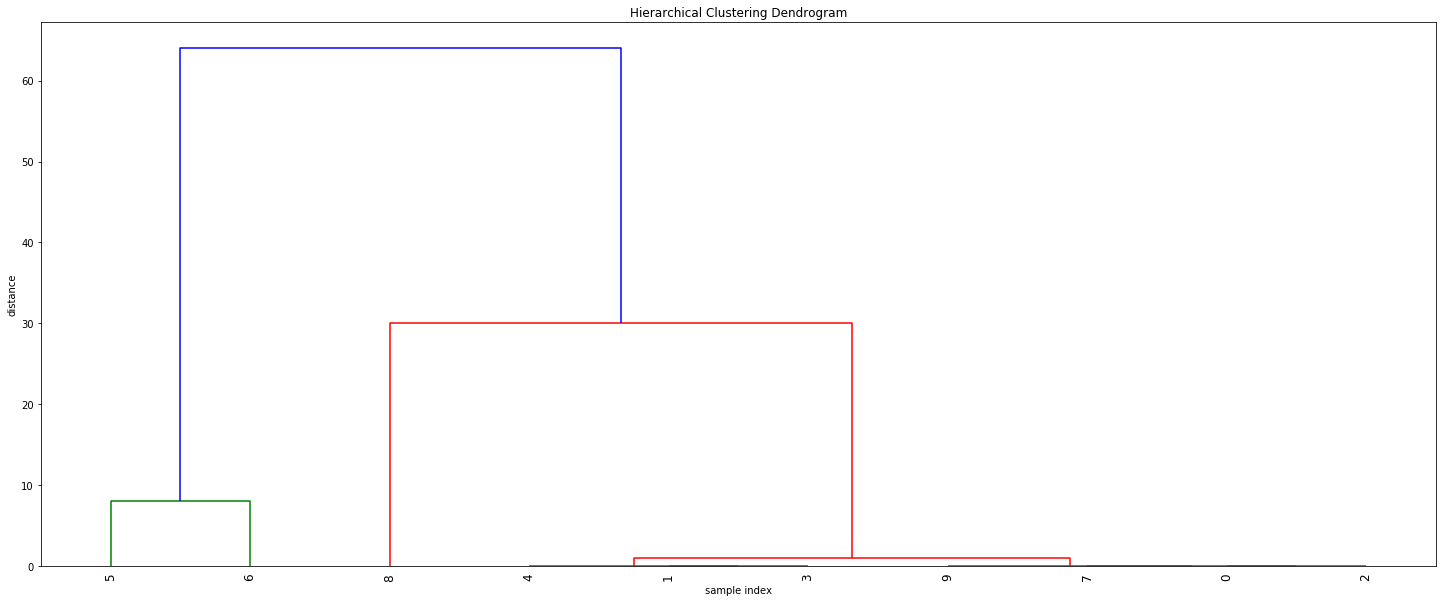

In [19]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)
plt.show()